
<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Twitter Sentiment Analysis (LSTM || RNN)
</div>

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/06/79592twitter.jpg)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     What is Sentiment Analysis ?
</div>

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique used to determine the sentiment or emotional tone conveyed in a piece of text. It involves analyzing text data to identify and extract subjective information such as opinions, sentiments, attitudes, and emotions expressed by individuals or entities towards specific topics, products, services, events, or experiences.

![](https://calln.com/wp-content/uploads/2019/10/Sentiment-Analysis-Infographic-860x600-860x600.png)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Steps in Sentiment Analysis
</div>


- **Data Collection**: Gather the text data from various sources such as social media, customer reviews, surveys, or any other relevant sources. Ensure that the data collected is relevant to the sentiment analysis task at hand.

- **Data Preprocessing**:
  - *Text Cleaning*: Remove noise from the text data by removing special characters, punctuation, HTML tags, URLs, and other irrelevant symbols.
  - *Tokenization*: Split the text into individual words or tokens.
  - *Lowercasing*: Convert all text to lowercase to ensure consistency in word representation.
  - *Stopword Removal*: Eliminate common words such as "the", "is", "and", etc., which do not carry significant meaning for sentiment analysis.
  - *Stemming or Lemmatization*: Reduce words to their base or root form to normalize the text data.
  - *Handling Negations*: Address negations (e.g., "not good") to ensure accurate sentiment analysis.

- **Feature Extraction**:
  - *Bag-of-Words (BoW)*: Represent the text data as a numerical feature vector based on word frequencies.
  - *TF-IDF (Term Frequency-Inverse Document Frequency)*: Assign weights to words based on their frequency in the document and inverse frequency across the entire corpus.
  - *Word Embeddings*: Utilize pre-trained word embeddings such as Word2Vec, GloVe, or FastText to represent words as dense vector representations.

- **Model Selection**:
  - Choose an appropriate sentiment analysis model based on the nature of the data and the complexity of the sentiment analysis task. Common models include:
    - Rule-based models
    - Lexicon-based models
    - Supervised machine learning models (e.g., Naive Bayes, Support Vector Machines, Logistic Regression)
    - Unsupervised machine learning models (e.g., VADER, TextBlob)
    - Deep learning models (e.g., Recurrent Neural Networks, Convolutional Neural Networks, Transformers)

- **Training the Model**:
  - If using supervised learning, split the data into training and validation sets.
  - Train the selected sentiment analysis model on the training data, optimizing the model's parameters to improve performance.

- **Model Evaluation**:
  - Assess the performance of the trained sentiment analysis model using evaluation metrics such as accuracy, precision, recall, F1-score, or area under the ROC curve (AUC).

- **Deployment**:
  - Deploy the trained sentiment analysis model to production or integrate it into the desired application or system.

- **Post-Processing and Interpretation**:
  - Analyze the sentiment predictions and interpret the results to gain insights into the sentiment expressed in the text data.
  - Post-processing techniques may include aggregating sentiment scores, visualizing sentiment trends, or extracting key insights.

- **Model Fine-Tuning (Optional)**:
  - Fine-tune the sentiment analysis model based on feedback, changing data distributions, or evolving requirements to improve performance over time.

- **Monitoring and Maintenance**:
  - Continuously monitor the performance of the sentiment analysis model in production and update it as needed to maintain its effectiveness.

These steps provide a structured framework for conducting sentiment analysis tasks effectively and accurately. The specific implementation may vary depending on the nature of the text data and the requirements of the sentiment analysis project.


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Importing Libraries
</div>

In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 377.7 kB/s eta 0:00:00


In [2]:
import numpy as np 
import pandas as pd 
import os
from textblob import Word
import nltk
import tensorflow as tf
import contractions
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus  import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from tensorflow import keras
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag
from sklearn.metrics import accuracy_score
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-03-15 14:15:28.109939: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 14:15:28.110044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 14:15:28.389703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/twitter-sentiment/twitter_validation.csv
/kaggle/input/twitter-sentiment/twitter_training.csv



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Reading The Dataset
</div>

In [3]:
column_names = ['ID', 'Game/Topic', 'Sentiment', 'Tweet']

twitter_train = pd.read_csv("/kaggle/input/twitter-sentiment/twitter_training.csv", names=column_names)
twitter_val = pd.read_csv("/kaggle/input/twitter-sentiment/twitter_validation.csv",names = column_names)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Twitter Data Sample 
</div>

In [4]:
twitter_train.sample(5)

,ID,Game/Topic,Sentiment,Tweet
55231,2283,CallOfDuty,Irrelevant,Trio fun last night..
58075,11558,TomClancysRainbowSix,Negative,@ Rainbow6Game servers are in the Xbox
49374,6076,FIFA,Negative,Fifa ultimate teams fucking dug meat
34561,6736,Fortnite,Irrelevant,Both halo counterfeiters and Fortnite creators...
64856,7909,MaddenNFL,Negative,How did @ EAMaddenNFL make a worse game than @...


In [5]:
twitter_val.sample(5)

,ID,Game/Topic,Sentiment,Tweet
111,5265,Hearthstone,Neutral,Joe Buck is excited when Hearthstone
668,11153,TomClancysGhostRecon,Negative,@GhostRecon you telling lights are bulletproof...
847,10307,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,Are u crazy gloating as if u r his fan n not a...
876,4865,GrandTheftAuto(GTA),Irrelevant,This guy is one of the best content creators ...
389,9082,Nvidia,Positive,This is insane! Makes me want to upgrade my GPU



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Twitter Data Visualization 
</div>

<Figure size 2000x2000 with 0 Axes>

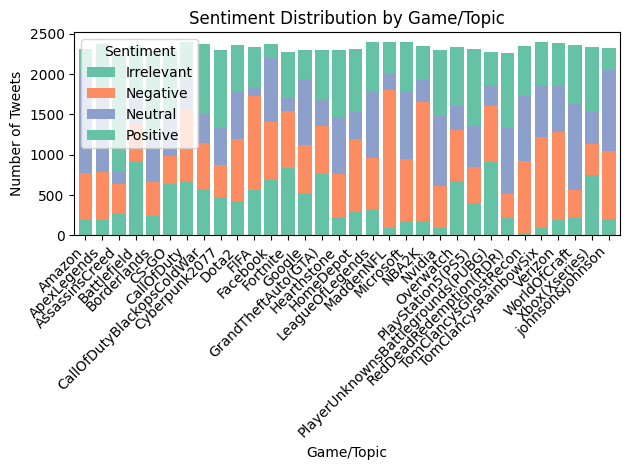

In [6]:

sentiment_counts = twitter_train.groupby(['Game/Topic', 'Sentiment']).size().unstack(fill_value=0)
bar_width = 0.8
plt.figure(figsize=(20, 20))
# Plot the bar chart with adjusted width
colors = {'Positive': '#66c2a5', 'Negative': '#fc8d62', 'Neutral': '#8da0cb'}  
sentiment_counts.plot(kind='bar', stacked=True, width=bar_width,color=colors.values())

# Additional plotting configurations
plt.title('Sentiment Distribution by Game/Topic')
plt.xlabel('Game/Topic')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

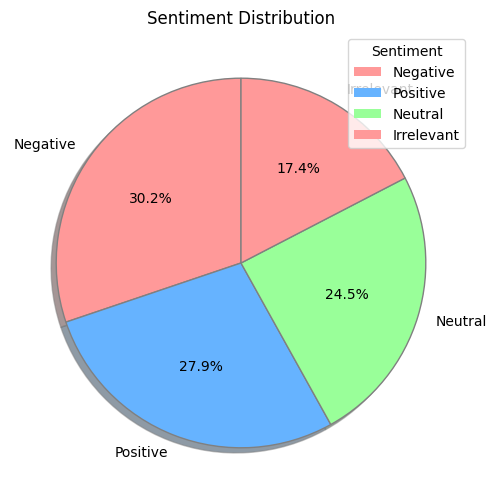

In [7]:
sentiment_counts = twitter_train['Sentiment'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']  
plt.figure(figsize=(6, 6)) 
pie = sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title('Sentiment Distribution')
plt.ylabel('')  # Remove the y-label
plt.legend(title='Sentiment', loc='upper right', labels=sentiment_counts.index)  
for wedge in pie.patches:
    wedge.set_edgecolor('gray') 

plt.show()

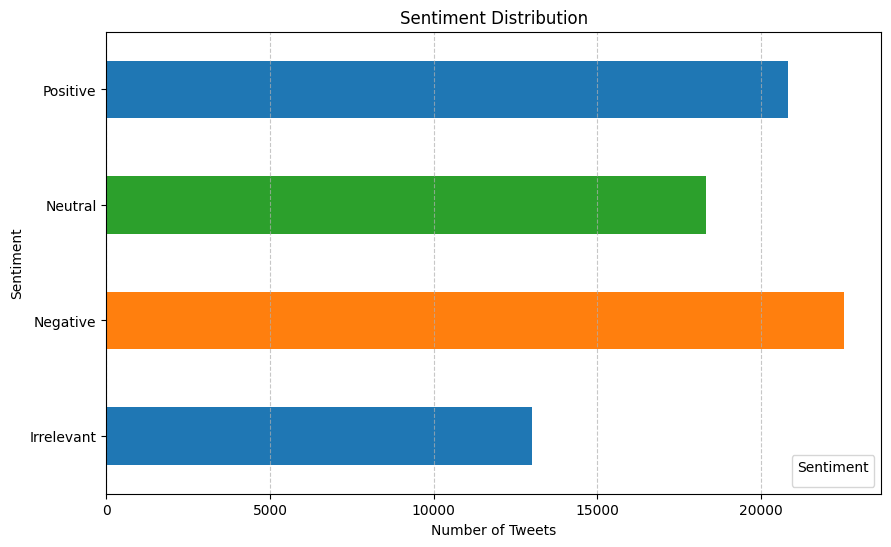

In [8]:

sentiment_counts = twitter_train.groupby('Sentiment').size()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(10, 6))  
sentiment_counts.plot(kind='barh', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.ylabel('Sentiment')
plt.legend(title='Sentiment', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Twitter Data Preprocessing  
</div>

* **Null Value Checking And Removing**

In [9]:
twitter_train.isnull().sum() , twitter_val.isnull().sum()

(ID              0
 Game/Topic      0
 Sentiment       0
 Tweet         686
 dtype: int64,
 ID            0
 Game/Topic    0
 Sentiment     0
 Tweet         0
 dtype: int64)

In [10]:
twitter_train.dropna(inplace = True)

* **LowerCasing**

In [11]:
twitter_train['Tweet'] = twitter_train['Tweet'].str.lower()
twitter_val['Tweet'] = twitter_val['Tweet'].str.lower()

* **Removing HTML Tags**

In [12]:
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

twitter_train['Tweet'] = twitter_train['Tweet'].apply(remove_html)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(remove_html)

* **Removing URL's**

In [13]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

twitter_train['Tweet'] = twitter_train['Tweet'].apply(remove_url)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(remove_url)


* **Removing Alphanumeric Characters**

In [14]:
def remove_alphanumeric(text):
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return pattern.sub(r'',text)
twitter_train['Tweet'] = twitter_train['Tweet'].apply(remove_alphanumeric)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(remove_alphanumeric)

* **Removing Punctuations**

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(text):
    exclude = string.punctuation
    return ''.join(char for char in text if char not in exclude )

twitter_train['Tweet'] = twitter_train['Tweet'].apply(remove_punctuation)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(remove_punctuation)

* **Removing Contractions**

In [17]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

twitter_train['Tweet'] = twitter_train['Tweet'].apply(expand_contractions)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(expand_contractions)

* **Tokenize The Text**

In [18]:
def do_tokenization(text):
    token_words = word_tokenize(text)
    return token_words

twitter_train['Tweet'] = twitter_train['Tweet'].apply(do_tokenization)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(do_tokenization)

In [19]:
twitter_train.sample(5)

,ID,Game/Topic,Sentiment,Tweet
58856,3290,Facebook,Irrelevant,"[i, have, joined, a, facebook, group, on, indo..."
31617,7428,LeagueOfLegends,Negative,"[faders, are, a, threat, people, who, can, not..."
12515,8550,NBA2K,Positive,"[i, should, not, spoil, i, follow, a, handful,..."
51015,6357,FIFA,Irrelevant,"[after, questionable, actions, they, had, to, ..."
36405,8247,Microsoft,Neutral,"[afternoon, coffee, find, goto, vendors, to, w..."


* **Removing Stop Words**

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def remove_stopwords(tokens):
    stop_words_english = stopwords.words('english')
    return [token for token in tokens if token not in stop_words_english]

twitter_train['Tweet'] = twitter_train['Tweet'].apply(remove_stopwords)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(remove_stopwords)

* **Stemming The Text**

In [22]:
def do_stemming(tokens):
    ps = PorterStemmer()
    return [ps.stem(token) for token in tokens]

twitter_train['Tweet'] = twitter_train['Tweet'].apply(do_stemming)
twitter_val['Tweet'] = twitter_val['Tweet'].apply(do_stemming)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Word Cloud  
</div>

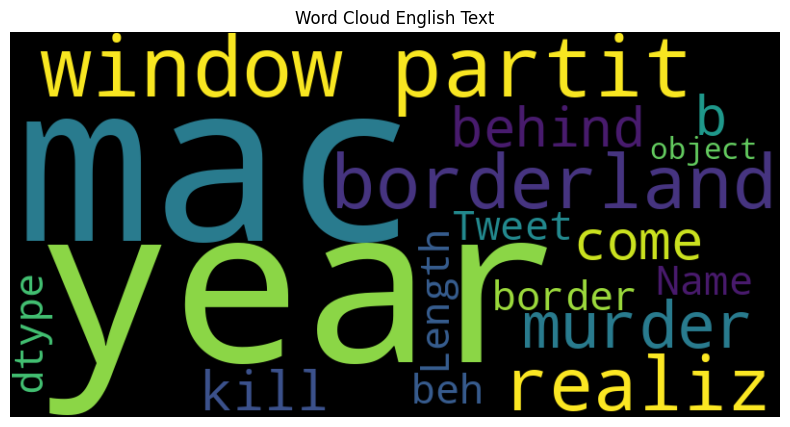

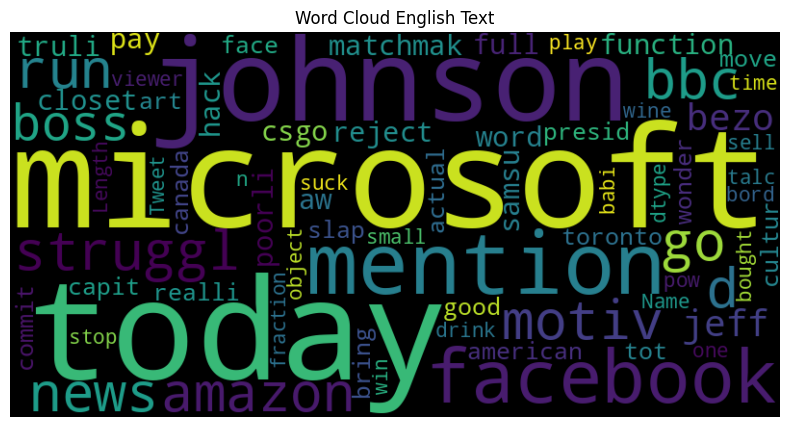

In [23]:
def generate_wordcloud(text):
    text_str = ' '.join(map(str, text))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(str(text))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  
    plt.title(f"Word Cloud English Text")
    plt.axis('off')
    plt.show()

generate_wordcloud(twitter_train['Tweet'])
generate_wordcloud(twitter_val['Tweet'])

In [24]:
def calculate_max_sequence_length(text):
    max_length = max(len(sequence) for sequence in text)
    return max_length

maximum_length = calculate_max_sequence_length(twitter_train['Tweet'])
print("Maximum length is :",maximum_length)

Maximum length is : 163


In [25]:
def calculate_max_sequence_length(text):
    max_length = max(len(sequence) for sequence in text)
    return max_length

maximum_length_test = calculate_max_sequence_length(twitter_val['Tweet'])
print("Maximum length is :",maximum_length_test)

Maximum length is : 41


 <div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Tokenization on text data  
</div>

In [26]:
tok = Tokenizer()
tok.fit_on_texts(twitter_train['Tweet'])

In [27]:
twitter_train['Tweet'] = tok.texts_to_sequences(twitter_train['Tweet'])

In [28]:
tok_test = Tokenizer()
tok_test.fit_on_texts(twitter_val['Tweet'])

In [29]:
twitter_val['Tweet'] = tok_test.texts_to_sequences(twitter_val['Tweet'])

* **Training Word2Vec**

In [30]:
#word2vec_model = Word2Vec(sentences=twitter_train['Tweet'], vector_size=100, window=5, min_count=1, workers=4)

In [31]:
#word_embeddings = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

In [32]:
#sequences = [[word2vec_model.wv[word] for word in tweet if word in word2vec_model.wv.index_to_key] for tweet in twitter_train['Tweet']]

* **Validation Word2Vec**

In [33]:
#word2vec_model_val = Word2Vec(sentences=twitter_val['Tweet'], vector_size=100, window=5, min_count=1, workers=4)

In [34]:
#word_embeddings_val = {word: word2vec_model_val.wv[word] for word in word2vec_model_val.wv.index_to_key}

In [35]:
#sequences_val = [[word2vec_model_val.wv[word] for word in tweet if word in word2vec_model_val.wv.index_to_key] for tweet in twitter_val['Tweet']]

* **Converting Sentiment Column into numerical formate**

In [36]:
twitter_train['Sentiment'].value_counts()

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [37]:
#Now we are goining to convert Neutral and Irrelevent into negative 
for index, row in twitter_train.iterrows():
    if row['Sentiment'] == 'Neutral' or row['Sentiment'] == 'Irrelevant':
        twitter_train.loc[index, 'Sentiment'] = 'Negative'

In [38]:
"""from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_test = LabelEncoder()
twitter_train['Sentiment'] = le.fit_transform(twitter_train['Sentiment'])
twitter_val['Sentiment'] = le_test.fit_transform(twitter_val['Sentiment'])
unique_values, counts = np.unique(twitter_train['Sentiment'], return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")"""

'from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nle_test = LabelEncoder()\ntwitter_train[\'Sentiment\'] = le.fit_transform(twitter_train[\'Sentiment\'])\ntwitter_val[\'Sentiment\'] = le_test.fit_transform(twitter_val[\'Sentiment\'])\nunique_values, counts = np.unique(twitter_train[\'Sentiment\'], return_counts=True)\n\n# Print unique values and their counts\nfor value, count in zip(unique_values, counts):\n    print(f"{value}: {count}")'

In [39]:
twitter_train['Sentiment'].value_counts()

Sentiment
Negative    53341
Positive    20655
Name: count, dtype: int64

In [40]:
twitter_train.sample(3)

,ID,Game/Topic,Sentiment,Tweet
11749,8419,NBA2K,Negative,"[396, 42, 6926, 1347, 721, 1396, 597, 5385, 10..."
59538,3406,Facebook,Negative,"[175, 22147]"
1536,2669,Borderlands,Positive,"[2, 69, 7, 134, 556, 1309, 656, 177, 1661, 467..."


In [41]:
twitter_val.sample(3)

,ID,Game/Topic,Sentiment,Tweet
13,4286,CS-GO,Neutral,"[58, 1532, 542, 976, 1533]"
838,9788,PlayStation5(PS5),Positive,"[44, 21, 796, 3, 15, 1453, 54]"
224,2785,Borderlands,Negative,"[17, 81, 625, 2129, 2130, 2131, 47, 17, 1157, ..."



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Train Test Split  
</div>

In [42]:
Sentiment = twitter_train['Sentiment']

In [43]:
Sentiment_test = twitter_val['Sentiment']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(twitter_train['Tweet'],twitter_train['Sentiment'],test_size=0.2, random_state=42)

In [45]:
"""from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=4)
y_test_encoded = to_categorical(y_test,num_classes=4)
Sentiment_test_encoded = to_categorical(Sentiment_test,num_classes=4)"""

'from keras.utils import to_categorical\ny_train_encoded = to_categorical(y_train, num_classes=4)\ny_test_encoded = to_categorical(y_test,num_classes=4)\nSentiment_test_encoded = to_categorical(Sentiment_test,num_classes=4)'


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Sample Representation Of Words How Words How Words Get Converted Into Numbers  
</div>

In [46]:
for num in x_train[806]:
    print(num,end = " ")

47 5636 7 40 3247 21 84 49 1232 60 7287 33 440 9567 4107 4108 7288 35 522 7289 99 114 4600 3743 1158 237 25 86 148 

In [47]:
for num in x_train[806]:
    word = tok.index_word.get(num)
    print(word,end = " ")

1 warfram 2 dead daylight 3 overwatch 4 minecraft 5 uhhh know honestli feral primal carnag extinct would add spore well let sentiment nostalgia tag anyon want feel free 


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     Padding on data 
</div>

In [48]:
#x_train_main = pad_sequences(x_train,maxlen = 163,padding= "post")
#x_test_main = pad_sequences(x_test,maxlen = 163,padding = "post")

In [49]:
x_train_main = pad_sequences(x_train, maxlen=163, dtype='float32', padding='post', truncating='post')
x_test_main = pad_sequences(x_test, maxlen=163, dtype='float32', padding='post', truncating='post')

In [50]:
twitter_val_tweet = twitter_val['Tweet']

In [51]:
Tweet_main = pad_sequences(twitter_val_tweet,maxlen=163, dtype='float32', padding='post', truncating='post') 

In [52]:
x_train_main[0]

array([   89.,   464.,   104.,    53.,   189.,   556.,   112.,   281.,
         962.,   475.,  6331.,  4468.,  1215., 11487.,   198.,  1655.,
       17571.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
      

In [53]:
Tweet_main[0]

array([1479.,   39.,  440.,  956.,    5.,  129.,   30., 1480.,  957.,
         56., 1481., 1482.,    3.,  958.,  357.,  959.,   52.,  960.,
        537.,  227.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [54]:
sentiment_mapping = {'Negative': 0, 'Positive': 1}
y_train = y_train.map(sentiment_mapping)
y_test = y_test.map(sentiment_mapping)

In [55]:
print("X_train_review type:", type(x_train_main))
print("X_train_review shape:", x_train_main.shape)

print("y_train_sentiment type:", type(y_train))
print("y_train_sentiment shape:", y_train.shape)

print("X_test_review type:", type(x_test_main))
print("X_test_review shape:", x_test_main.shape)

print("y_test_sentiment type:", type(y_test))
print("y_test_sentiment shape:", y_test.shape)

X_train_review type: <class 'numpy.ndarray'>
X_train_review shape: (59196, 163)
y_train_sentiment type: <class 'pandas.core.series.Series'>
y_train_sentiment shape: (59196,)
X_test_review type: <class 'numpy.ndarray'>
X_test_review shape: (14800, 163)
y_test_sentiment type: <class 'pandas.core.series.Series'>
y_test_sentiment shape: (14800,)



<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     (LSTM || RNN Model) Architecture
</div>

![](https://miro.medium.com/v2/resize:fit:1039/1*QiLYco0hB8EterWYTyyv4g.png)

In [56]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tok.word_index)+1, output_dim=100))
model_lstm.add(LSTM(150))
model_lstm.add(Dense(units=1, activation='sigmoid'))

In [57]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [58]:
history = model_lstm.fit(x_train_main, y_train, batch_size=32, epochs=10, validation_data=(x_test_main,y_test))

Epoch 1/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7208 - loss: 0.5946 - val_accuracy: 0.7217 - val_loss: 0.5913
Epoch 2/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7217 - loss: 0.5918 - val_accuracy: 0.7217 - val_loss: 0.5913
Epoch 3/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7182 - loss: 0.5952 - val_accuracy: 0.7217 - val_loss: 0.5915
Epoch 4/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7222 - loss: 0.5912 - val_accuracy: 0.7217 - val_loss: 0.5930
Epoch 5/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7207 - loss: 0.5928 - val_accuracy: 0.7217 - val_loss: 0.5917
Epoch 6/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7222 - loss: 0.5911 - val_accuracy: 0.7217 - val_loss: 0.5952
Epoch 7/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7215 - loss: 0.5921 - val_accuracy: 0.7217 - val_loss: 0.5914
Epoch 8/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7209 -

In [59]:
print(model_lstm.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 163, 100)       │     3,188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,016,255 (38.21 MB)

 Trainable params: 3,338,751 (12.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,677,504 (25.47 MB)

None


* **Training with whole data**

In [60]:
x_combined = np.concatenate((x_train_main, x_test_main), axis=0)
print("Combined shape:", x_combined.shape)

Combined shape: (73996, 163)


In [61]:
y_combined = np.concatenate((y_train, y_test), axis=0)

In [62]:
model_lstm_whole = Sequential()
model_lstm_whole.add(Embedding(input_dim=len(tok.word_index)+1, output_dim=100))
model_lstm_whole.add(LSTM(150))
model_lstm_whole.add(Dense(units=1, activation='sigmoid'))

In [63]:
model_lstm_whole.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_lstm_whole.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [64]:
history_whole = model_lstm_whole.fit(x_combined ,y_combined, batch_size=32, epochs=10)

Epoch 1/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7183 - loss: 0.5972
Epoch 2/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7245 - loss: 0.5893
Epoch 3/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7213 - loss: 0.5922
Epoch 4/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7216 - loss: 0.5918
Epoch 5/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7198 - loss: 0.5936
Epoch 6/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7201 - loss: 0.5931
Epoch 7/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7223 - loss: 0.5908
Epoch 8/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7176 - loss: 0.5954
Epoch 9/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7174 - loss: 0.5955
Epoch 10/10
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7215 - loss: 0.5918


In [65]:
model_lstm_whole.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 163, 100)       │     3,188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,016,255 (38.21 MB)

 Trainable params: 3,338,751 (12.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,677,504 (25.47 MB)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     (GRU Hypertune|| RNN Model) Architecture
</div>

![](https://production-media.paperswithcode.com/methods/780px-Gated_Recurrent_Unit_type_1.svg.png)

In [66]:
def GRU_model(hp):
    model_gru = keras.Sequential()
    model_gru.add(keras.layers.Embedding(input_dim=len(tok.word_index) + 1, output_dim=100, input_shape=(x_train_main.shape[1],)))
    
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    model_gru.add(keras.layers.GRU(units, return_sequences=True))
    model_gru.add(keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model_gru.add(keras.layers.GRU(units, return_sequences=True))
        model_gru.add(keras.layers.Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))
        
    model_gru.add(keras.layers.GRU(units))
    model_gru.add(keras.layers.Dropout(rate=hp.Float('final_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    
    model_gru.add(keras.layers.Dense(1, activation='sigmoid'))  
    
    model_gru.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])
    
    print("Model built with the following architecture:")
    model_gru.summary()
    
    return model_gru


In [67]:
import kerastuner as kt

tuner = kt.RandomSearch(
    GRU_model,
    objective='val_accuracy',
    max_trials=2,
    directory='/kaggle/working/',
    project_name='GRU_hyperparameter_tuning1'
)

Model built with the following architecture:


/tmp/ipykernel_26/2612215179.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 163, 100)       │     3,188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 163, 32)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 163, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 163, 32)        │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 163, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,569 (12.26 MB)

 Trainable params: 3,213,569 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
import tensorflow
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

In [69]:
tuner.search(
    x=x_train_main,
    y=y_train,
    epochs=10,
    validation_data=(x_test_main, y_test),
    callbacks=[early_stopping]
)

Trial 2 Complete [00h 18m 31s]
val_accuracy: 0.7216891646385193

Best val_accuracy So Far: 0.7216891646385193
Total elapsed time: 00h 29m 39s


In [70]:
best_hyper_parameter = tuner.get_best_hyperparameters(num_trials=1)[0]

In [71]:
gru_model = tuner.hypermodel.build(best_hyper_parameter)

Model built with the following architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 163, 100)       │     3,188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 163, 128)       │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 163, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_8 (GRU)                     │ (None, 163, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 163, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 163, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 163, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 163, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 163, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 163, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 163, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12 (GRU)                    │ (None, 163, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 163, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,870,881 (14.77 MB)

 Trainable params: 3,870,881 (14.77 MB)

 Non-trainable params: 0 (0.00 B)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     (LSTM || RNN Model) Training Graph
</div>

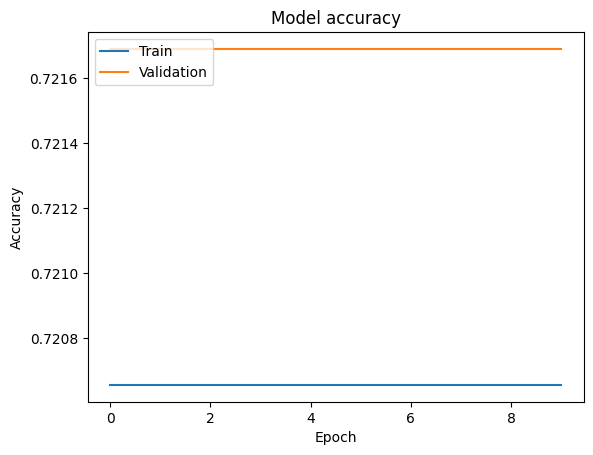

In [72]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

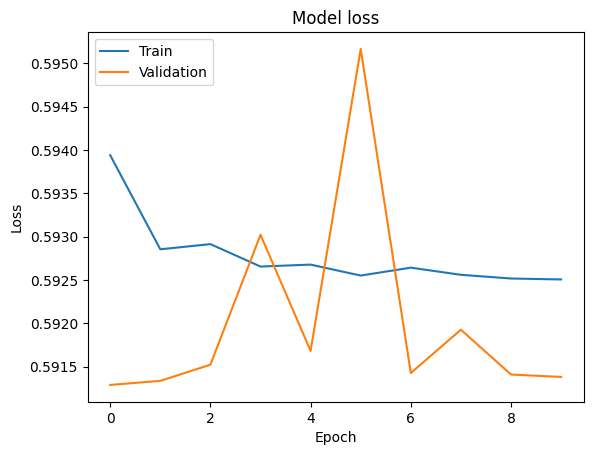

In [73]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
     (LSTM || RNN Model) Prediction
</div>

In [74]:
lstm_model_prediction = model_lstm.predict(Tweet_main)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [75]:
lstm_model_prediction = (lstm_model_prediction > 0.5).astype('int')